# Variables in the World Happiness Report 

## by Danya Ramirez

## Investigation Overview

Data is everywhere nowadays, and lots of it. 
Sometimes, this is necessary. But others, it may be too much. 
This brief analysis intends to detect whether or not all variables in the World Happiness Report should have been included.

## Dataset Overview
The analysis explores data from the World Happiness Report (2016 - 2017 - 2018 - 2019).
This is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be (from data.world).
The report also includes results from the Gallup survey, which scores citizens' perceptions regarding their situation in relation to a variety of topics. 


The dataset includes 624 rows and nine variables. The variables include: 
- country
- year 
- happiness score 
- GDP per capita 
- social support
- Healthy Life Expectancy
- perception of freedom to make choices
- generosity
- and perceptions of corruption in government and businesses

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
happy = pd.read_csv("world_happiness_report.csv")

In [4]:
# Create a copy of the dataframe to keep all the original data untouched
happy_original = happy.copy()

In [5]:
# In order to keep the data as consistent as possible within the country, replace the null value with the mean of
# the values associated with this country only.
uae = happy.query("Country == 'United Arab Emirates'")
happy.at[331,'Perceptions of corruption'] = uae["Perceptions of corruption"].mean()

In [6]:
# Change column names to more manageable names
happy.rename(columns={"Country":"country", "Year":"year", "Score":"score","Social support":"support",
                      "GDP per capita": "gdp_pc", "Healthy life expectancy": "hale", 
                      "Freedom to make life choices":"freedom", "Generosity": "gen", 
                      "Perceptions of corruption":"perc_corr"}, inplace=True)

## Let's get to it

## What is the happiness score worldwide?

### If we consider the happiness score as a range from 0 to 10...

### What was the score worldwide? Did it improve from 2016 to 2019?

In [7]:
# Isolate data for score means per year
years = happy.groupby("year", as_index = False)["score"].mean()

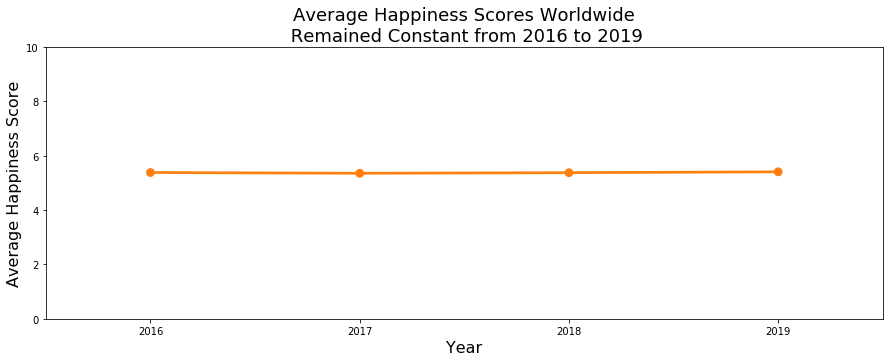

In [8]:
fig, ax = plt.subplots(figsize=[15,5])
base_color = sb.color_palette()[1]
plot = sb.pointplot(ax = ax, data = years, x = "year", y = "score", color = base_color)
plot.axes.set_title("Average Happiness Scores Worldwide\n Remained Constant from 2016 to 2019",fontsize=18)
plot.set_xlabel("Year",fontsize=16)
plot.set_ylabel("Average Happiness Score",fontsize=16)
plt.ylim(0, 10);

### What did we learn?
Happiness scores around the world remained stable from 2016 to 2019 between 5.3 and 5.4.

## Let's look further.

## Which countries had the highest happiness scores in 2019?

In [9]:
# Isolate data for 2019
y2019 = happy.query("year == '2019'")

In [10]:
# Isolate highest score rows
y2019h = y2019.sort_values("score", ascending=False).head(7)

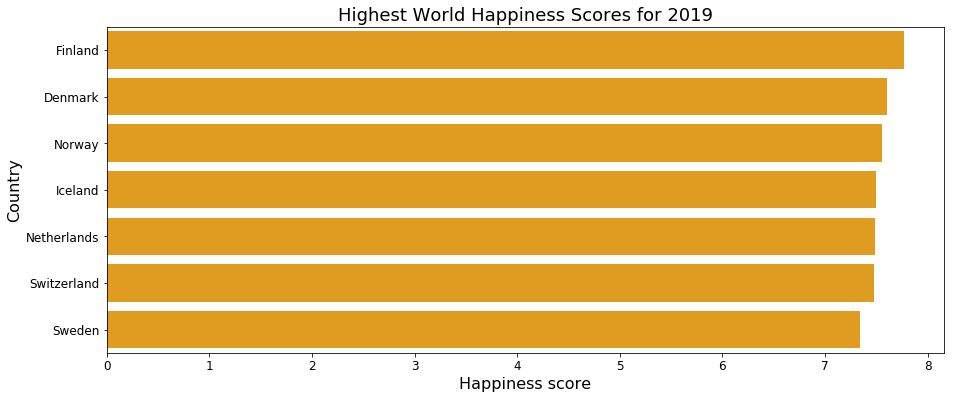

In [11]:
# Create barplot for highest scores in 2019
plt.figure(figsize=(15,6))
sb.barplot(y="country", x="score", data=y2019h, color="orange")
sb.set_style("ticks")
plt.title("Highest World Happiness Scores for 2019", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Happiness score', size=16)
plt.ylabel('Country', size=16);

# Which countries had the lowest happiness scores in 2019?


In [12]:
# Isolate lowest happiness scores for 2019
y2019l = y2019.sort_values("score", ascending=False).tail(7)

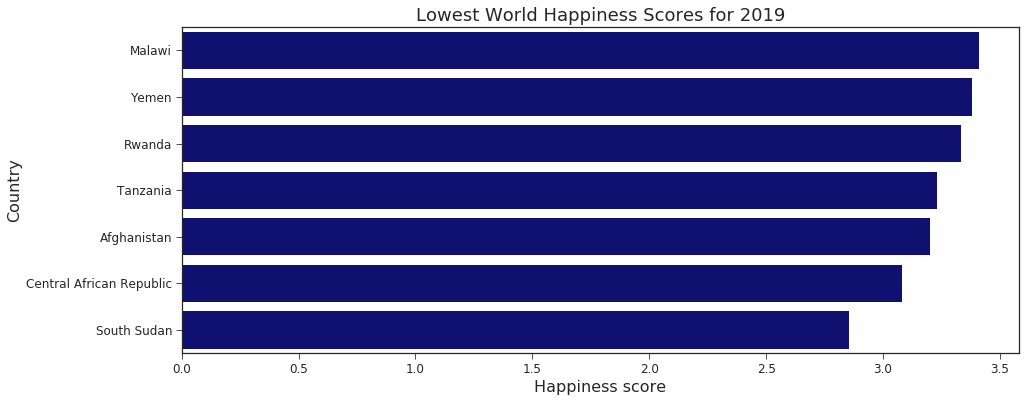

In [13]:
# Create barplot for lowest scores in 2019
plt.figure(figsize=(15,6))
sb.barplot(y="country", x="score", data=y2019l, color="navy")
sb.set_style("ticks")
plt.title("Lowest World Happiness Scores for 2019", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Happiness score', size=16)
plt.ylabel('Country', size=16);

### What did we learn?
Western European countries and African and Middle Eastern countries seem to be at opposite ends of the Happiness Score continuum. 

Countries in Western Europe are toward the highest end, and African and Middle Eastern countries, toward the lowest end.

## How does Happiness Score correlate with the other variables in the report?

In [14]:
# Isolate numerical variables to create a correlation matrix
numeric = happy[["score", "gdp_pc", "support", "hale", "freedom", "gen", "perc_corr"]]

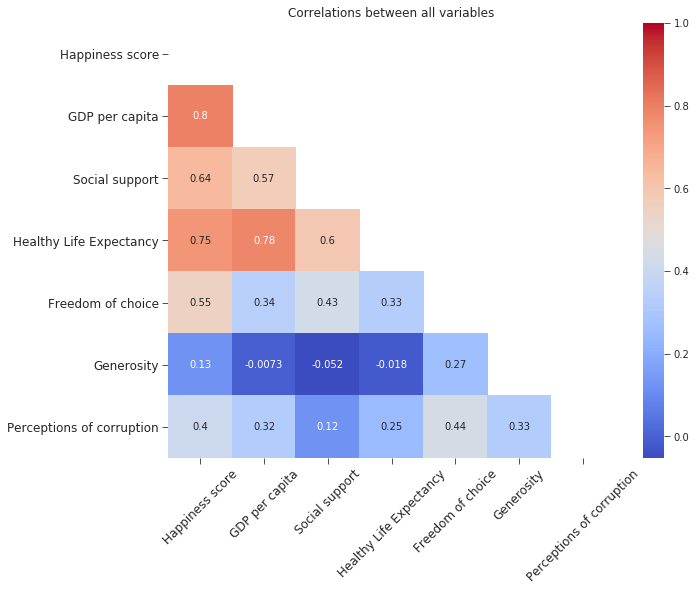

In [15]:
# Create correlation matrix heatmap plot (code guide from https://heartbeat.fritz.ai/)
fig = plt.figure(figsize = [10,8])
matrix = np.triu(numeric.corr())
x_axis_labels = ["Happiness score", "GDP per capita", "Social support", "Healthy Life Expectancy", "Freedom of choice", "Generosity", "Perceptions of corruption"]
y_axis_labels = ["Happiness score", "GDP per capita", "Social support", "Healthy Life Expectancy", "Freedom of choice", "Generosity", "Perceptions of corruption"]
sb.heatmap(numeric.corr(), annot = True, cmap = 'coolwarm', mask=matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)
plt.title("Correlations between all variables");

### What did we learn?
All variables are at least moderately correlated with Happiness Score, except for "Generosity." Also, besides Healthy Life Expectancy and GDP per capita, Social support generated the strongest correlation with the Happiness score.

## Are these correlations kept accross time?

The following scatter plots show a lack of correlation for *generosity* and *happiness scores*, across the board.

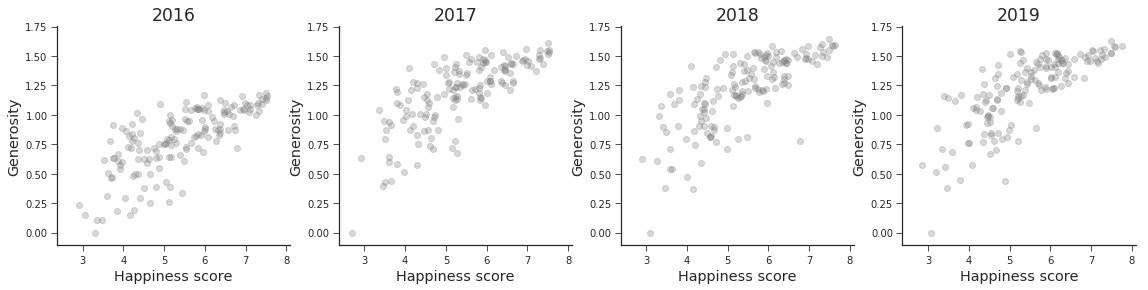

In [16]:
# Create Faceted Grids with scatterplots for the happiness score and generosity, one per year 2016, 2017, 2018, 2019.
g = sb.FacetGrid(data = happy, col = "year", size=4)
g.map(plt.scatter, "score", "support", alpha=0.3, color="gray")
g.set_titles('{col_name}')
g.axes[0,0].set_xlabel('Happiness score', fontsize='x-large')
g.axes[0,1].set_xlabel('Happiness score', fontsize='x-large')
g.axes[0,2].set_xlabel('Happiness score', fontsize='x-large')
g.axes[0,3].set_xlabel('Happiness score', fontsize='x-large')
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize='xx-large')
    ax.set_ylabel("Generosity", fontsize='x-large');

And the following plots show how the correlation between *support* and *happiness scores* has increased over time.

(Indeed, when grouped by year, the correlation goes over 0.7 every year.)

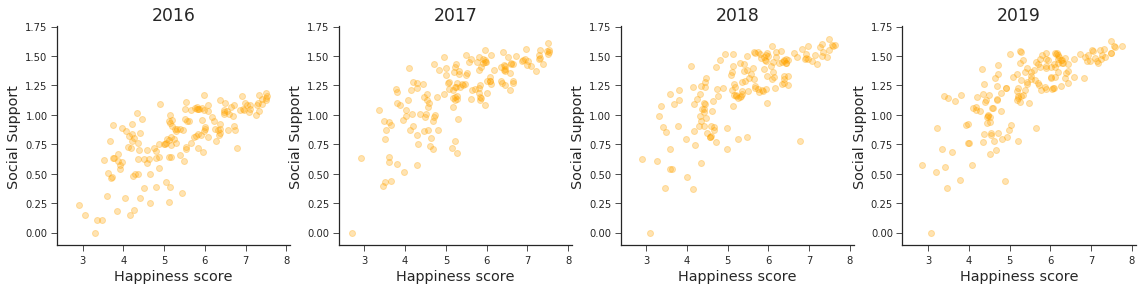

In [17]:
# Create Faceted Grids with scatterplots for the happiness score and support, one per year 2016, 2017, 2018, 2019.
g = sb.FacetGrid(data = happy, col = "year", size=4)
g.map(plt.scatter, "score", "support", alpha=0.3, color="orange")
g.set_titles('{col_name}')
g.axes[0,0].set_xlabel('Happiness score', fontsize='x-large')
g.axes[0,1].set_xlabel('Happiness score', fontsize='x-large')
g.axes[0,2].set_xlabel('Happiness score', fontsize='x-large')
g.axes[0,3].set_xlabel('Happiness score', fontsize='x-large')
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize='xx-large')
    ax.set_ylabel("Social Support", fontsize='x-large');

### To sum up

"Generosity" - at least how it is defined in this report - has no correlation with Happiness Scores, which is not necessarily unexpected. Generosity was defined as the ratio of donations in the year over GDP per capita. But does a higher GDP necessarily entail that all economic groups in a country have spare resources to donate?

Moreover, is the term "generosity" not receiving a rather narrow definition in this report? Different cultures may regard generosity in different ways that are either as or more impactful and/or satisfactory than monetary transactions. 

In any case, the lack of correlation leaves why this variable was included in the report unexplained.

On the other hand, besides GDP per capita and Healthy Life Expectancy, which are variables that are not determined by people's *perceptions*, Social Support - or having people to count on in times of trouble - is the variable that most strongly correlates with the Happiness Score.

...Financial resources, health and community. It makes sense.

All this means that besides making sure people have access to a dignified income and health care, it is important that people __create__ and __maintain__ meaningful social support networks, and that local organizations, governments and businesses provide citizens with the time flexibility, the place, and the support to do so. 

### Back to you: 

Do you feel that you have social support? How could you contribute to the creation of social support networks in your community or workplace?

In [ ]:
!jupyter nbconvert presentation_file.ipynb --to slides --post serve  --no-input --no-prompt 

[NbConvertApp] Converting notebook presentation_file.ipynb to slides
[NbConvertApp] Writing 506793 bytes to presentation_file.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/presentation_file.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not fou